<a href="https://colab.research.google.com/github/suryavanshi1448/12301448/blob/main/final12301448.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CarDekho 50k Dataset

# ------------------ 1) IMPORT LIBRARIES ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# ------------------ 2) LOAD DATASET ------------------
df = pd.read_csv('cardekho_style_cars_50k.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          50000 non-null  int64  
 1   brand         50000 non-null  object 
 2   km_driven     50000 non-null  int64  
 3   mileage       50000 non-null  float64
 4   engine        50000 non-null  int64  
 5   max_power     50000 non-null  float64
 6   torque        50000 non-null  float64
 7   seats         50000 non-null  int64  
 8   fuel_type     50000 non-null  object 
 9   transmission  50000 non-null  object 
 10  owner_count   50000 non-null  int64  
 11  price         50000 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 4.6+ MB


,year,km_driven,mileage,engine,max_power,torque,seats,owner_count,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2009.091680,100727.972360,19.975477,1900.811900,119.990588,230.348528,5.501080,1.993300,144273.929080
std,8.342284,57654.541769,5.772211,635.244198,46.310611,98.019293,1.116075,0.818113,62199.831737
min,1995.000000,1003.000000,10.000000,800.000000,40.000000,60.000000,4.000000,1.000000,30000.000000
25%,2002.000000,50664.500000,14.970000,1350.000000,79.600000,145.875000,5.000000,1.000000,95778.250000
50%,2009.000000,100809.000000,19.940000,1901.000000,119.900000,230.500000,6.000000,2.000000,143937.500000
75%,2016.000000,150730.500000,24.960000,2453.000000,160.000000,315.200000,6.000000,3.000000,192320.250000
max,2023.000000,199998.000000,30.000000,2999.000000,200.000000,400.000000,7.000000,3.000000,295942.000000


In [3]:
# ------------------ 3) DATA CLEANING ------------------
# Remove duplicates
df = df.drop_duplicates()


# Remove invalid values
df = df[(df['year'] >= 1995) & (df['year'] <= 2024)]
df = df[df['price'] > 0]


# Remove outliers using IQR method
num_cols = ['km_driven', 'mileage', 'engine', 'max_power', 'torque', 'price']


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]


for col in num_cols:
    df = remove_outliers_iqr(df, col)


# Encode categorical variables
label_cols = ['brand', 'fuel_type', 'transmission']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

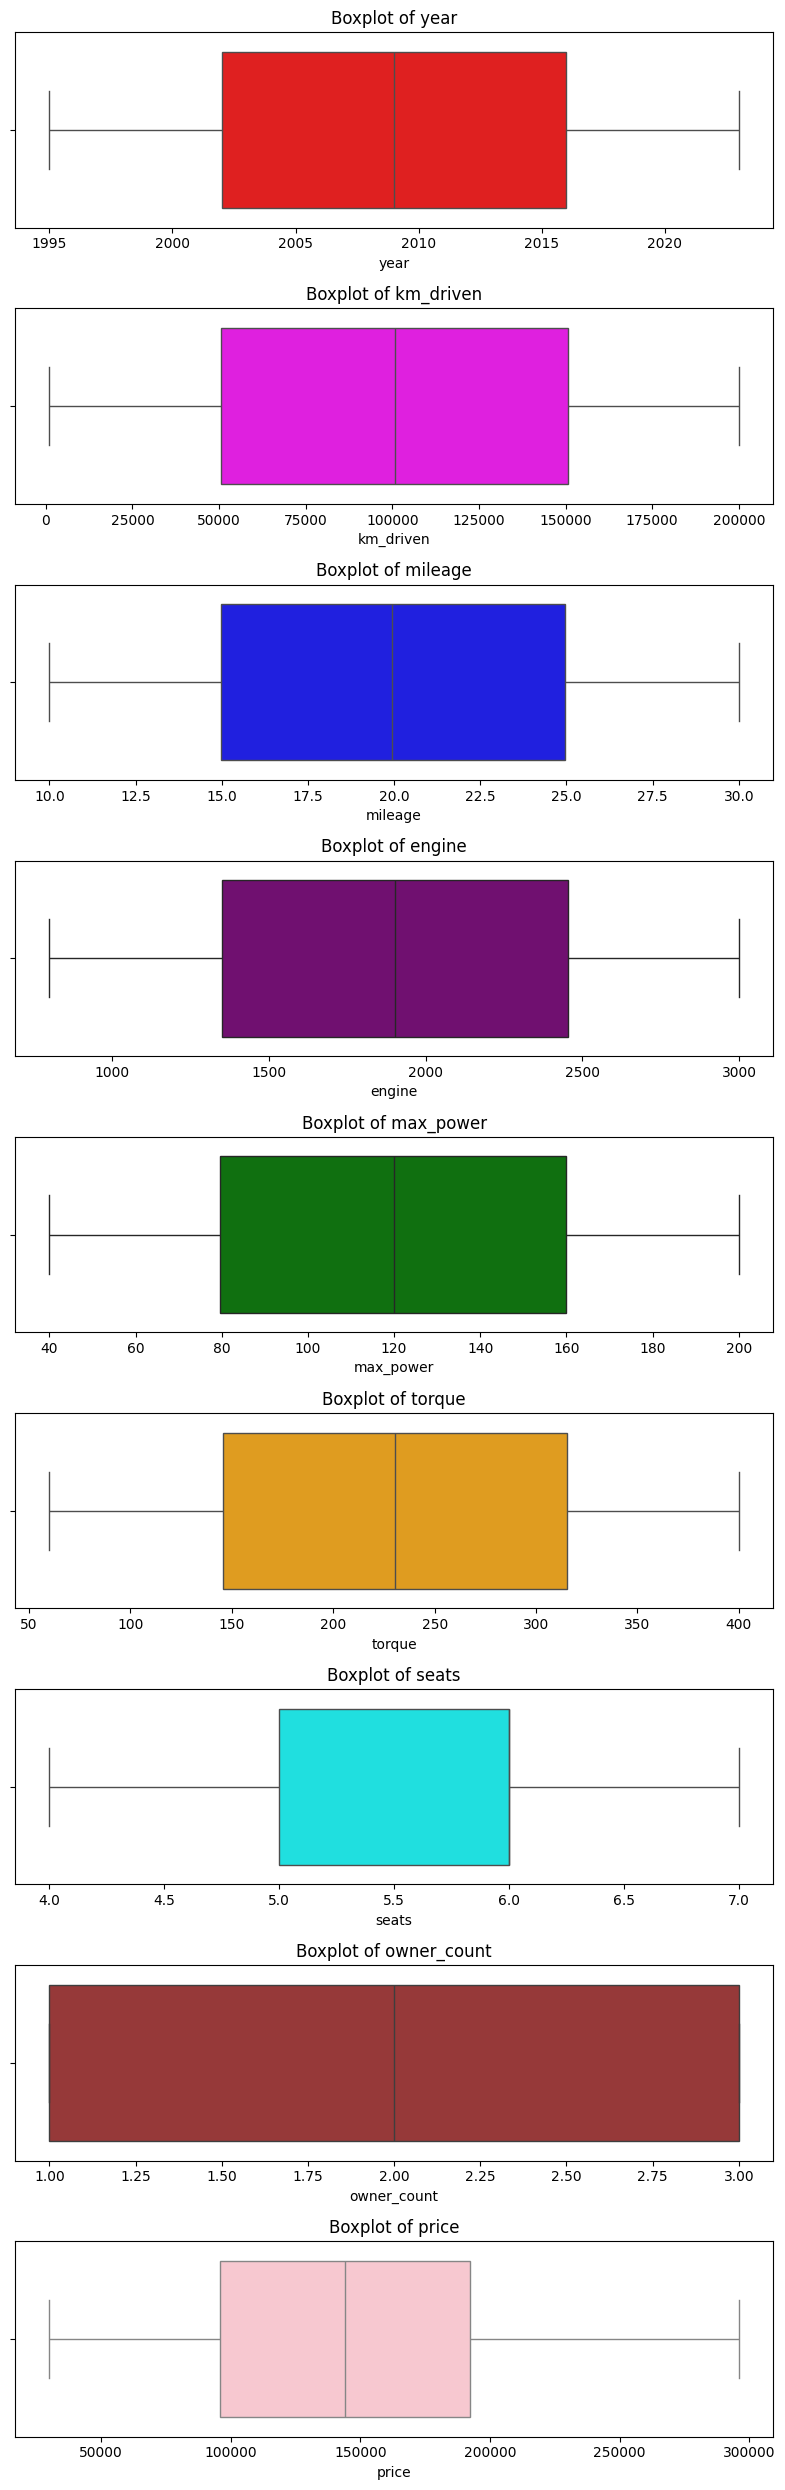

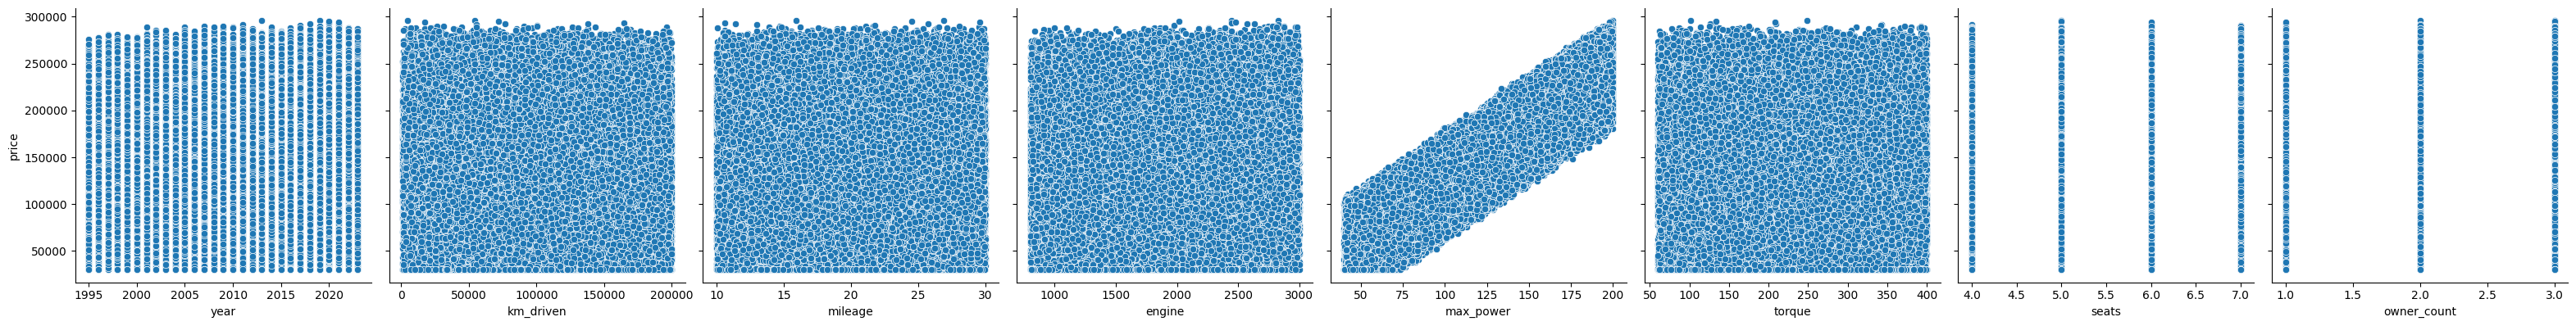

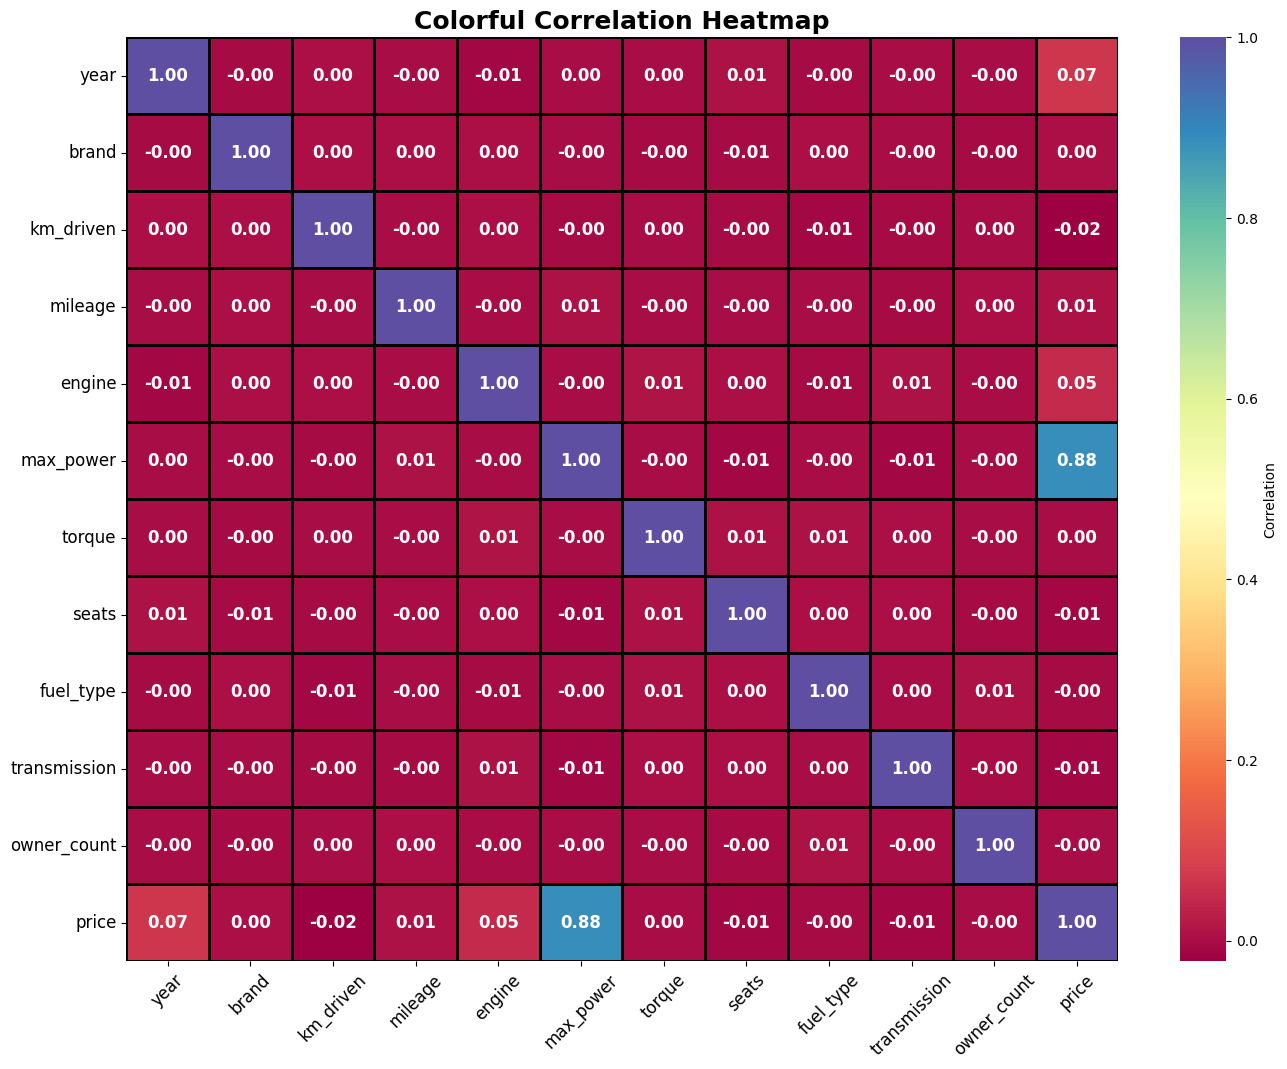

In [4]:
# ------------------ 4) EDA ------------------
# Boxplots
numeric_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'owner_count', 'price']
fig, axs = plt.subplots(len(numeric_cols),1, figsize=(8,25))
colors = ['red','magenta','blue','purple','green','orange','cyan','brown','pink']
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], color=colors[i%len(colors)], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Pairplot for features vs price
x_vars = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'owner_count']
y_var = 'price'
sns.pairplot(df, x_vars=x_vars, y_vars=y_var, kind='scatter', height=4, aspect=1)
plt.show()


# Colorful correlation heatmap
plt.figure(figsize=(16,12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Spectral', linewidths=1, linecolor='black', cbar_kws={'label':'Correlation'}, annot_kws={'size':12,'weight':'bold'})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Colorful Correlation Heatmap', fontsize=18, weight='bold')
plt.show()

In [5]:
# ------------------ 5) TRAIN-TEST SPLIT ------------------
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# ------------------ 6) LINEAR REGRESSION ------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print('Linear Regression Results:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_lr)))
print('R2 Score:', r2_score(y_test, pred_lr))

Linear Regression Results:
RMSE: 28329.015767974746
R2 Score: 0.7923337995837321


In [7]:
# ------------------ 7) RANDOM FOREST ------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print('Random Forest Results:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('R2 Score:', r2_score(y_test, pred_rf))

Random Forest Results:
RMSE: 28895.86223347949
R2 Score: 0.7839401049940458


In [8]:
# ------------------ 8) XGBOOST ------------------
xgb = XGBRegressor(n_estimators=300, learning_rate=0.08, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print('XGBoost Results:')
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_xgb)))
print('R2 Score:', r2_score(y_test, pred_xgb))

XGBoost Results:
RMSE: 28776.22463076072
R2 Score: 0.7857255339622498


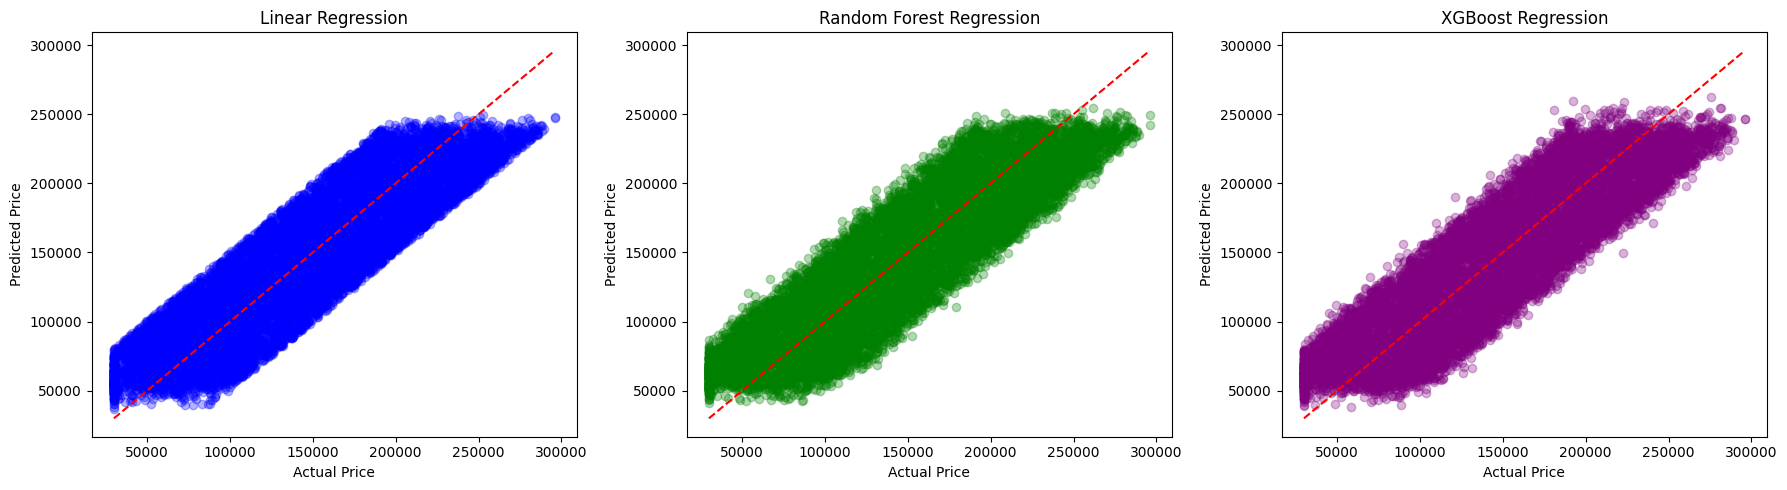

In [9]:
# ------------------ 9) REGRESSION PLOTS ------------------
plt.figure(figsize=(18,5))
# Linear Regression
plt.subplot(1,3,1)
plt.scatter(y_test, pred_lr, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
# Random Forest
plt.subplot(1,3,2)
plt.scatter(y_test, pred_rf, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regression')
# XGBoost
plt.subplot(1,3,3)
plt.scatter(y_test, pred_xgb, alpha=0.3, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Regression')
plt.tight_layout()
plt.show()

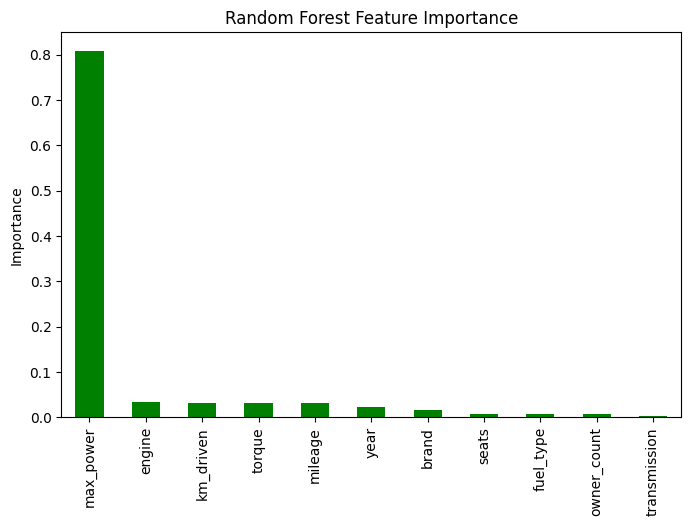

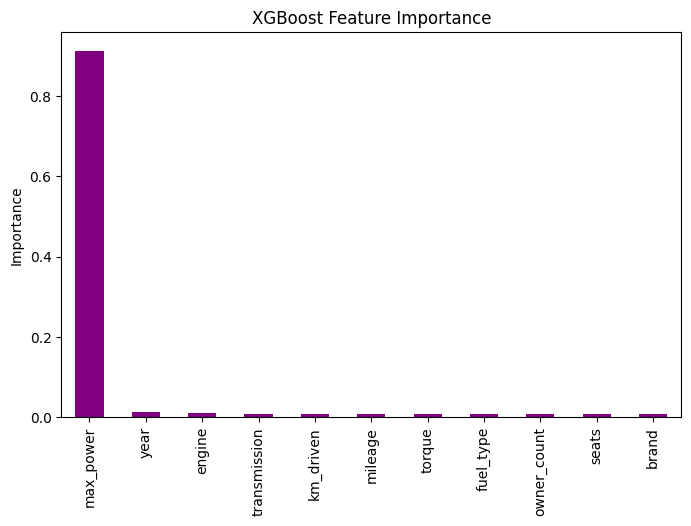

In [10]:
# ------------------ 10) FEATURE IMPORTANCE ------------------
# Random Forest
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
rf_importances.plot(kind='bar', color='green')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance')
plt.show()


# XGBoost
xgb_importances = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
xgb_importances.plot(kind='bar', color='purple')
plt.title('XGBoost Feature Importance')
plt.ylabel('Importance')
plt.show()

In [11]:
# ------------------ 11) SAVE CLEANED DATA & MODELS ------------------
df.to_csv('car_cleaned_50k.csv', index=False)
joblib.dump(lr, 'linear_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(xgb, 'xgb_model.pkl')
print('Cleaned dataset and models saved!')

Cleaned dataset and models saved!


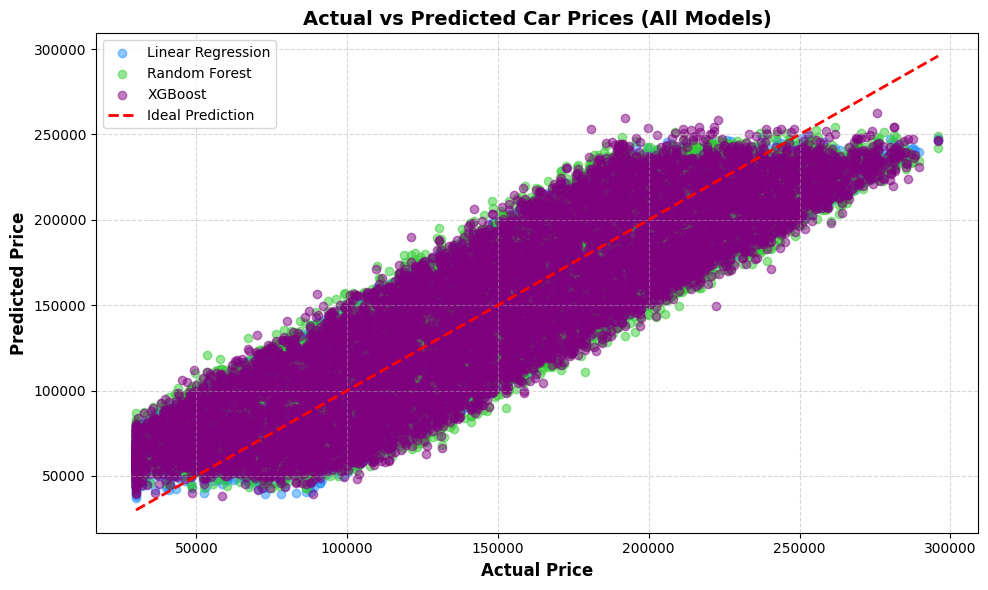

In [12]:
# ------------------ COMBINED REGRESSION PLOT FOR CARDEKHO (Colorful) ------------------
plt.figure(figsize=(10,6))

plt.scatter(y_test, pred_lr, alpha=0.5, color='dodgerblue', label='Linear Regression')
plt.scatter(y_test, pred_rf, alpha=0.5, color='limegreen', label='Random Forest')
plt.scatter(y_test, pred_xgb, alpha=0.5, color='purple', label='XGBoost')

# Plot ideal prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linewidth=2, linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Price', fontsize=12, weight='bold')
plt.ylabel('Predicted Price', fontsize=12, weight='bold')
plt.title('Actual vs Predicted Car Prices (All Models)', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
